In [1]:
%load_ext autoreload
%autoreload 2

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os, json
from hydranerv.utils import utils, disp

In [24]:
# save the offsets of each video
offsets = {'ctr':
               [
                   [0, 2000, 4000, 6000, 8000, 9900, 11000, 13000], # 1
                   [0, 2000, 4000, 6000, 7900, 9900, 12000], # 2
                   [0, 2000, 4000, 6000, 8000, 12000], # 3
                   [0, 1900, 3900, 6000, 8000], # 4
                   [0, 2000, 3900], # 5
                   [0, 2000, 4000, 7000, 10000], # 6
                   [0, 2000, 4000, 6000, 8000, 11000] # 7
               ],
           'lo':
               [
                   [0, 2000, 6000, 10000, 12000], # 1
                   [0, 2000, 4000, 6000, 10000], # 2
                   [0, 600, 3000, 6000, 10000, 12000] # 3
               ],
           'hi':
               [
                   [0, 2000, 3900, 6000, 8000, 10000, 12000], # 1
                   [0, 2500, 4900, 7000, 9400, 11900], # 2
                   [0, 1900, 5000, 9000, 11000], # 3
                   [0, 2000, 4500, 7000, 9000, 11000, 13100], # 4
                   [0, 2500, 5000, 7500, 9500, 12000], # 5
                   [0, 3000, 6000, 9000] # 6
               ]
              }

In [85]:
clusters_ctr_all, clusters_ctr_per_video = utils.get_clusters(7, './cb_locs/wataru_data/ctr/', display=False, offsets=offsets['ctr'], realign=False)
clusters_lo_all, clusters_lo_per_video = utils.get_clusters(3, './cb_locs/wataru_data/low/', display=False, offsets=offsets['lo'], realign=False)
clusters_hi_all, clusters_hi_per_video = utils.get_clusters(6, './cb_locs/wataru_data/high/', display=False, offsets=offsets['hi'], realign=False)

In [86]:
print(len(clusters_ctr_all), len(clusters_lo_all), len(clusters_hi_all))

166 88 127


In [12]:
with open('./cb_locs/wataru_data/offsets/offsets.json', 'w') as f:
    json.dump(offsets, f, ensure_ascii=False)

In [104]:
# calculate the interval prior to each cluster
def get_pre_intervals_per_video(clusters_per_video, fps=2):
    pre_intervals_per_video = []
    for ivideo, clusters in enumerate(clusters_per_video):
        pre_intervals = [-1]
        for icluster, cluster in enumerate(clusters):
            if icluster > 0:
                last_cluster = clusters[icluster-1]
                pre_intervals.append((cluster[0] - last_cluster[-1]) / fps)
        pre_intervals_per_video.append(pre_intervals)

    return pre_intervals_per_video

In [105]:
pre_intervals_ctr_per_video = get_pre_intervals_per_video(clusters_ctr_per_video)
pre_intervals_lo_per_video = get_pre_intervals_per_video(clusters_lo_per_video)
pre_intervals_hi_per_video = get_pre_intervals_per_video(clusters_hi_per_video)

In [116]:
def get_scatter_points(pre_intervals_per_video, clusters_per_video):
    scatters = []
    for ivideo, pre_intervals in enumerate(pre_intervals_per_video):
        for icluster, interval in enumerate(pre_intervals):
            pulse_num = len(clusters_per_video[ivideo][icluster])
            if icluster > 0:
                scatters.append((interval, pulse_num))
    return scatters

In [117]:
scatters_ctr = get_scatter_points(pre_intervals_ctr_per_video, clusters_ctr_per_video)
scatters_lo = get_scatter_points(pre_intervals_lo_per_video, clusters_lo_per_video)
scatters_hi = get_scatter_points(pre_intervals_hi_per_video, clusters_hi_per_video)

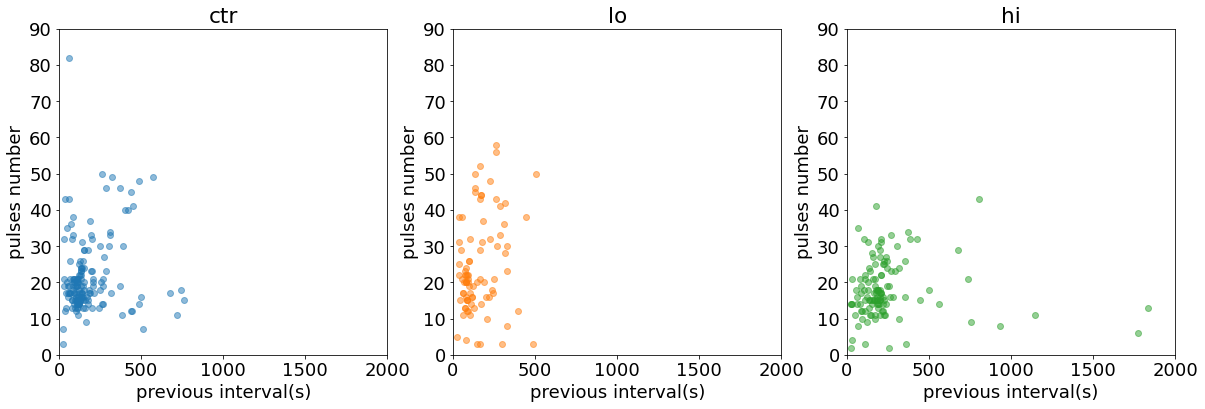

In [149]:
font = {'size' : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,6))
ax1, ax2, ax3 = fig.subplots(1,3)
for point in scatters_ctr:
    ax1.scatter(point[0], point[1], color='#1f77b4', alpha=.5)
    ax1.set_title('ctr')

for point in scatters_lo:
    ax2.scatter(point[0], point[1], color='#ff7f0e', alpha=.5)
    ax2.set_title('lo')

for point in scatters_hi:
    ax3.scatter(point[0], point[1], color='#2ca02c', alpha=.5)
    ax3.set_title('hi')

ax1.set_xlabel('previous interval(s)')
ax1.set_ylabel('pulses number')
ax1.set_xlim(0, 2000)
ax1.set_ylim(0, 90)

ax2.set_xlabel('previous interval(s)')
ax2.set_ylabel('pulses number')
ax2.set_xlim(0, 2000)
ax2.set_ylim(0, 90)

ax3.set_xlabel('previous interval(s)')
ax3.set_ylabel('pulses number')
ax3.set_xlim(0, 2000)
ax3.set_ylim(0, 90)

plt.show()

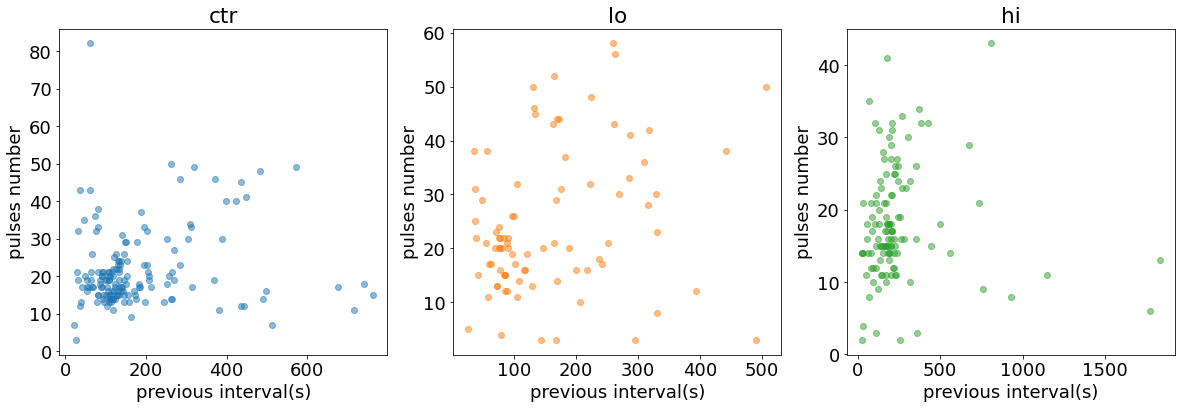

In [150]:
fig = plt.figure(figsize=(20,6))
ax1, ax2, ax3 = fig.subplots(1,3)
for point in scatters_ctr:
    ax1.scatter(point[0], point[1], color='#1f77b4', alpha=.5)
    ax1.set_title('ctr')

for point in scatters_lo:
    ax2.scatter(point[0], point[1], color='#ff7f0e', alpha=.5)
    ax2.set_title('lo')

for point in scatters_hi:
    ax3.scatter(point[0], point[1], color='#2ca02c', alpha=.5)
    ax3.set_title('hi')

ax1.set_xlabel('previous interval(s)')
ax1.set_ylabel('pulses number')

ax2.set_xlabel('previous interval(s)')
ax2.set_ylabel('pulses number')

ax3.set_xlabel('previous interval(s)')
ax3.set_ylabel('pulses number')
    
plt.show()

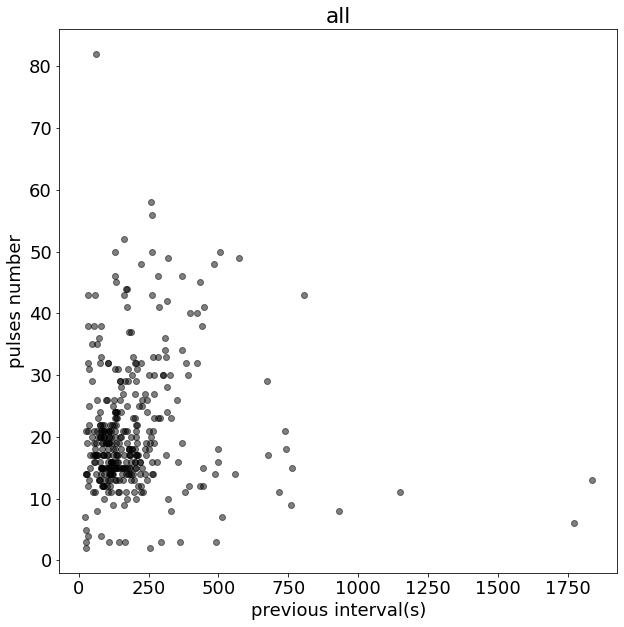

In [154]:
fig = plt.figure(figsize=(10,10))
for point in scatters_ctr + scatters_lo + scatters_hi:
    plt.scatter(point[0], point[1], color='k', alpha=.5)
    plt.title('all')

plt.xlabel('previous interval(s)')
plt.ylabel('pulses number')
plt.show()